In [1]:
%matplotlib inline
from IPython.display import Image, display
import numpy as np
import tensorflow as tf
import vgg19
from loss import gram_matrix
from images import load_image, add_one_dim, image_big

In [2]:
model_file_path = "vgg19/vgg19.mat"
net = vgg19.VGG19(model_file_path)

In [3]:
content_filename = 'data/content/dolphins.jpg'
content_image = load_image(content_filename, max_size=512)
shape = [content_image.shape[1], content_image.shape[0]]
content_image = add_one_dim(content_image)
print(content_image.shape)

style_filename = 'data/styles/random-art.jpg'
style_image = load_image(style_filename, shape=shape)
style_image = add_one_dim(style_image)

(1, 288, 512, 3)


In [4]:
content_layers = ['conv4_2']
style_layers = ['relu1_1', 'relu2_1', 'relu3_1', 'relu4_1', 'relu5_1']

In [5]:
iterations = 20
content_layer_weights = [1.0]
style_layer_weights = [0.2, 0.2, 0.2, 0.2, 0.2]
clw = 5e0
slw = 1e4
tvlw = 1e-3

In [6]:
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))

In [7]:
from style_transfer2 import StyleTransfer
import optimizers

st = StyleTransfer(
    sess,
    net,
    iterations,
    content_layers,
    style_layers,
    content_image,
    style_image,
    content_layer_weights,
    style_layer_weights,
    clw,
    slw,
    tvlw,
    optimizers.L_BFGS,
    plot=True,
    learning_rate=10,
    init_img_type="content"
)

Iteration: 0|loss 1166337695023104.0|0.0|116633772032.0|1971123.0


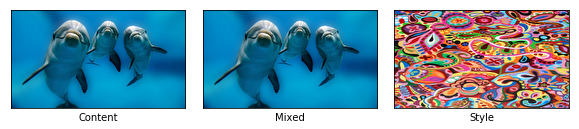

Iteration: 10|loss 703433099182080.0|1303731968.0|70342656000.0|8072986.5


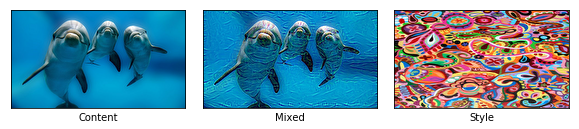

Iteration: 19|loss 73463704322048.0|2643007232.0|7345049600.0|15168040.0


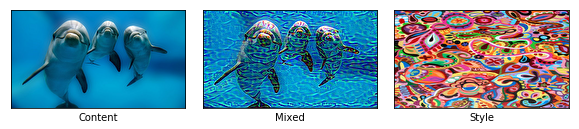

Iteration: 20|loss 57582207107072.0|2670316032.0|5756885504.0|15378456.0


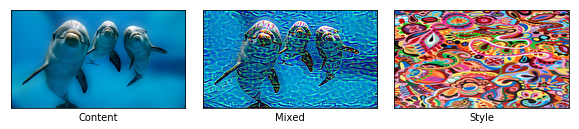

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
  Objective function value: 20402594119680.000000
  Number of iterations: 21
  Number of functions evaluations: 28


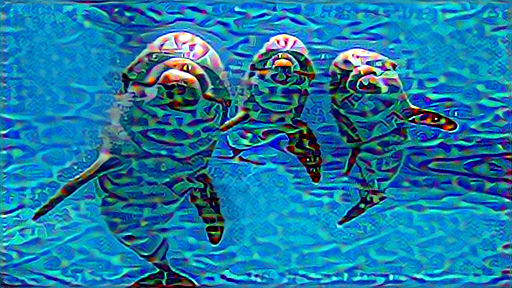

In [8]:
im = st.run()
image_big(im)